In [1]:
import os
from dotenv import load_dotenv
load_dotenv()

True

In [2]:
file_path = (
    "./docs/layout-parser-paper.pdf"
)

# Layout analysis and extraction of text from images


If you require a more granular segmentation of text (e.g., into distinct paragraphs, titles, tables, or other structures) or require extraction of text from images, the method below is appropriate. It will return a list of Document objects, where each object represents a structure on the page. The Document's metadata stores the page number and other information related to the object (e.g., it might store table rows and columns in the case of a table object).

Under the hood it uses the ```langchain-unstructured``` library. See the integration docs for more information about using Unstructured with LangChain.

Details of unstructured here:

https://python.langchain.com/docs/integrations/document_loaders/unstructured_file/

https://docs.unstructured.io/welcome



Unstructured supports multiple parameters for PDF parsing:

* strategy (e.g., ```"fast"``` or ```"hi-res"```)
* API or local processing. You will need an API key to use the API.

The ```hi-res``` strategy provides support for document layout analysis and OCR. 

https://docs.unstructured.io/api-reference/how-to/choose-hi-res-model


We demonstrate it below via the API. 

See local parsing section below for considerations when running locally.

https://python.langchain.com/docs/how_to/document_loader_pdf/#local-parsing

In [3]:
from langchain_unstructured import UnstructuredLoader

loader = UnstructuredLoader(
    file_path=file_path,
    strategy="hi_res",
    partition_via_api=True,
    coordinates=True,
)
docs = []
for doc in loader.lazy_load():
    docs.append(doc)

INFO: Preparing to split document for partition.
INFO: Starting page number set to 1
INFO: Allow failed set to 0
INFO: Concurrency level set to 5
INFO: Splitting pages 1 to 16 (16 total)
INFO: Determined optimal split size of 4 pages.
INFO: Partitioning 4 files with 4 page(s) each.
INFO: Partitioning set #1 (pages 1-4).
INFO: Partitioning set #2 (pages 5-8).
INFO: Partitioning set #3 (pages 9-12).
INFO: Partitioning set #4 (pages 13-16).
INFO: HTTP Request: POST https://api.unstructuredapp.io/general/v0/general "HTTP/1.1 200 OK"
INFO: HTTP Request: POST https://api.unstructuredapp.io/general/v0/general "HTTP/1.1 200 OK"
INFO: HTTP Request: POST https://api.unstructuredapp.io/general/v0/general "HTTP/1.1 200 OK"
INFO: Successfully partitioned set #1, elements added to the final result.
INFO: Successfully partitioned set #2, elements added to the final result.
INFO: Successfully partitioned set #3, elements added to the final result.
INFO: Successfully partitioned set #4, elements added 

In [4]:
print(len(docs))

187


In [19]:
for doc in docs:
    print(doc.metadata)

{'source': './docs/layout-parser-paper.pdf', 'coordinates': {'points': [[430.70318603515625, 314.6181335449219], [430.70318603515625, 410.7304382324219], [1271.916748046875, 410.7304382324219], [1271.916748046875, 314.6181335449219]], 'system': 'PixelSpace', 'layout_width': 1700, 'layout_height': 2200}, 'filetype': 'application/pdf', 'languages': ['eng'], 'page_number': 1, 'filename': 'layout-parser-paper.pdf', 'category': 'Title', 'element_id': 'b7f58c2fd9c15949a55a62eb84e39575'}
{'source': './docs/layout-parser-paper.pdf', 'coordinates': {'points': [[45.205963134765625, 602.969970703125], [45.205963134765625, 1555.5555555555554], [100.94444444444446, 1555.5555555555554], [100.94444444444446, 602.969970703125]], 'system': 'PixelSpace', 'layout_width': 1700, 'layout_height': 2200}, 'filetype': 'application/pdf', 'languages': ['eng'], 'page_number': 1, 'parent_id': 'b7f58c2fd9c15949a55a62eb84e39575', 'filename': 'layout-parser-paper.pdf', 'category': 'NarrativeText', 'element_id': 'faf8

Check one doc here

In [20]:
from IPython.display import display, JSON
display(JSON(docs[0].metadata))

<IPython.core.display.JSON object>

 display metadata for docs belonging to 1 whole page

In [22]:
# Iterate through the docs list and check for the page_number
for doc in docs:
    if doc.metadata.get('page_number') == 1:  # Check if page_number is 1
        print(doc.metadata)  # Print the metadata for documents on page 1

{'source': './docs/layout-parser-paper.pdf', 'coordinates': {'points': [[430.70318603515625, 314.6181335449219], [430.70318603515625, 410.7304382324219], [1271.916748046875, 410.7304382324219], [1271.916748046875, 314.6181335449219]], 'system': 'PixelSpace', 'layout_width': 1700, 'layout_height': 2200}, 'filetype': 'application/pdf', 'languages': ['eng'], 'page_number': 1, 'filename': 'layout-parser-paper.pdf', 'category': 'Title', 'element_id': 'b7f58c2fd9c15949a55a62eb84e39575'}
{'source': './docs/layout-parser-paper.pdf', 'coordinates': {'points': [[45.205963134765625, 602.969970703125], [45.205963134765625, 1555.5555555555554], [100.94444444444446, 1555.5555555555554], [100.94444444444446, 602.969970703125]], 'system': 'PixelSpace', 'layout_width': 1700, 'layout_height': 2200}, 'filetype': 'application/pdf', 'languages': ['eng'], 'page_number': 1, 'parent_id': 'b7f58c2fd9c15949a55a62eb84e39575', 'filename': 'layout-parser-paper.pdf', 'category': 'NarrativeText', 'element_id': 'faf8

In [23]:
# Iterate through the docs list and check for the page_number
for doc in docs:
    if doc.metadata.get('page_number') == 1:  # Check if page_number is 1
        print(doc.metadata.get('category'))  # Print only the category

Title
NarrativeText
NarrativeText
NarrativeText
NarrativeText
NarrativeText
NarrativeText
NarrativeText
NarrativeText
NarrativeText
Title
NarrativeText


We can use the document metadata to recover content from a single page:



In [24]:
first_page_docs = [doc for doc in docs if doc.metadata.get("page_number") == 1]

for doc in first_page_docs:
    print(doc.page_content)

LayoutParser: A Uniﬁed Toolkit for Deep Learning Based Document Image Analysis
2 0 2 n u J 1 2 ] V C . s c [ 2 v 8 4 3 5 1 . 3 0 1 2 : v i X r a
Zejiang Shen® (<), Ruochen Zhang?, Melissa Dell®, Benjamin Charles Germain Lee?, Jacob Carlson®, and Weining Li®
1 Allen Institute for AI shannons@allenai.org
2 Brown University ruochen zhang@brown.edu
3 Harvard University {melissadell,jacob carlson}@fas.harvard.edu
4 University of Washington bcgl@cs.washington.edu
5 University of Waterloo w422li@uwaterloo.ca
Abstract. Recent advances in document image analysis (DIA) have been primarily driven by the application of neural networks. Ideally, research outcomes could be easily deployed in production and extended for further investigation. However, various factors like loosely organized codebases and sophisticated model conﬁgurations complicate the easy reuse of im- portant innovations by a wide audience. Though there have been on-going eﬀorts to improve reusability and simplify deep learning (DL)

In [25]:
import fitz
import matplotlib.patches as patches
import matplotlib.pyplot as plt
from PIL import Image

def plot_pdf_with_boxes(pdf_page, segments):
    pix = pdf_page.get_pixmap()
    pil_image = Image.frombytes("RGB", [pix.width, pix.height], pix.samples)

    fig, ax = plt.subplots(1, figsize=(10, 10))
    ax.imshow(pil_image)
    categories = set()
    category_to_color = {
        "Title": "orchid",
        "Image": "forestgreen",
        "Table": "tomato",
    }
    for segment in segments:
        points = segment["coordinates"]["points"]
        layout_width = segment["coordinates"]["layout_width"]
        layout_height = segment["coordinates"]["layout_height"]
        scaled_points = [
            (x * pix.width / layout_width, y * pix.height / layout_height)
            for x, y in points
        ]
        box_color = category_to_color.get(segment["category"], "deepskyblue")
        categories.add(segment["category"])
        rect = patches.Polygon(
            scaled_points, linewidth=1, edgecolor=box_color, facecolor="none"
        )
        ax.add_patch(rect)

    # Make legend
    legend_handles = [patches.Patch(color="deepskyblue", label="Text")]
    for category in ["Title", "Image", "Table"]:
        if category in categories:
            legend_handles.append(
                patches.Patch(color=category_to_color[category], label=category)
            )
    ax.axis("off")
    ax.legend(handles=legend_handles, loc="upper right")
    plt.tight_layout()
    plt.show()

In [26]:
def render_page(doc_list: list, page_number: int, print_text=True) -> None:
    pdf_page = fitz.open(file_path).load_page(page_number - 1)
    page_docs = [
        doc for doc in doc_list if doc.metadata.get("page_number") == page_number
    ]
    segments = [doc.metadata for doc in page_docs]
    plot_pdf_with_boxes(pdf_page, segments)
    if print_text:
        for doc in page_docs:
            print(f"{doc.page_content}\n")

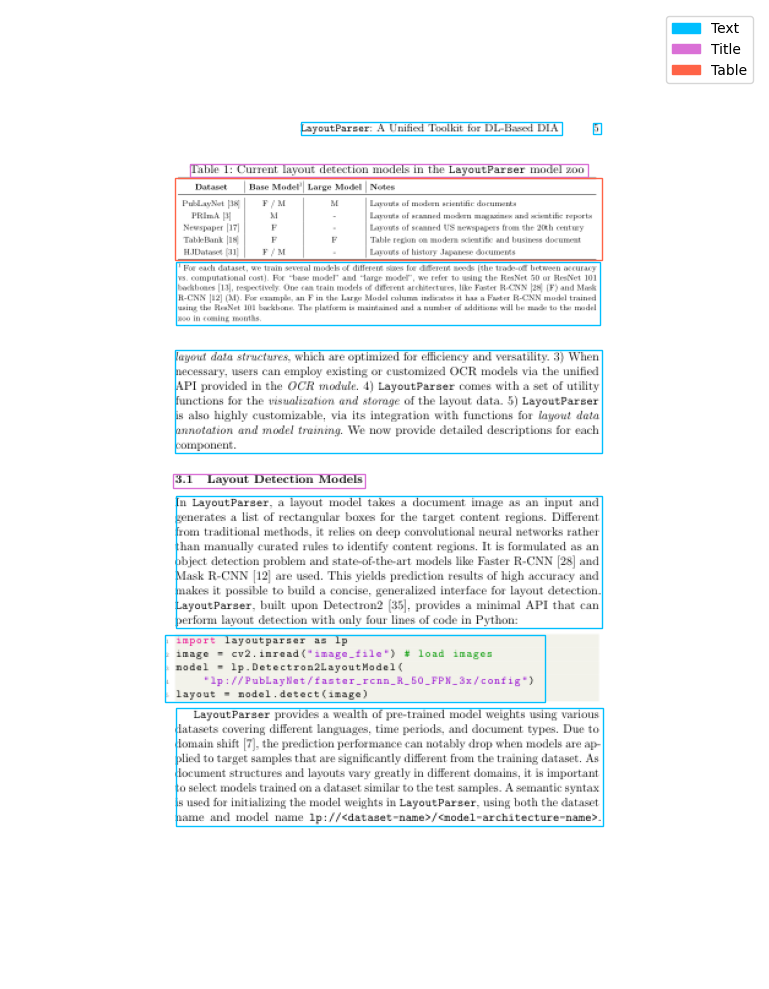

LayoutParser: A Uniﬁed Toolkit for DL-Based DIA

5

Table 1: Current layout detection models in the LayoutParser model zoo

Dataset Base Model1 Large Model Notes PubLayNet [38] F / M M Layouts of modern scientiﬁc documents PRImA [3] M - Layouts of scanned modern magazines and scientiﬁc reports Newspaper [17] F - Layouts of scanned US newspapers from the 20th century TableBank [18] F F Table region on modern scientiﬁc and business document HJDataset [31] F / M - Layouts of history Japanese documents

1 For each dataset, we train several models of diﬀerent sizes for diﬀerent needs (the trade-oﬀ between accuracy vs. computational cost). For “base model” and “large model”, we refer to using the ResNet 50 or ResNet 101 backbones [13], respectively. One can train models of diﬀerent architectures, like Faster R-CNN [28] (F) and Mask R-CNN [12] (M). For example, an F in the Large Model column indicates it has a Faster R-CNN model trained using the ResNet 101 backbone. The platform is maintaine

In [27]:
render_page(docs, 5)

# Reading specific data from metadata

Note that although the table text is collapsed into a single string in the document's content, the metadata contains a representation of its rows and columns:



In [28]:
from IPython.display import HTML, display

segments = [
    doc.metadata
    for doc in docs
    if doc.metadata.get("page_number") == 5 and doc.metadata.get("category") == "Table"
]

display(HTML(segments[0]["text_as_html"]))

# Extracting text from specific sections
Structures may have parent-child relationships -- for example, a paragraph might belong to a section with a title. If a section is of particular interest (e.g., for indexing) we can isolate the corresponding ```Document``` objects.

Below, we extract all text associated with the document's "Conclusion" section:

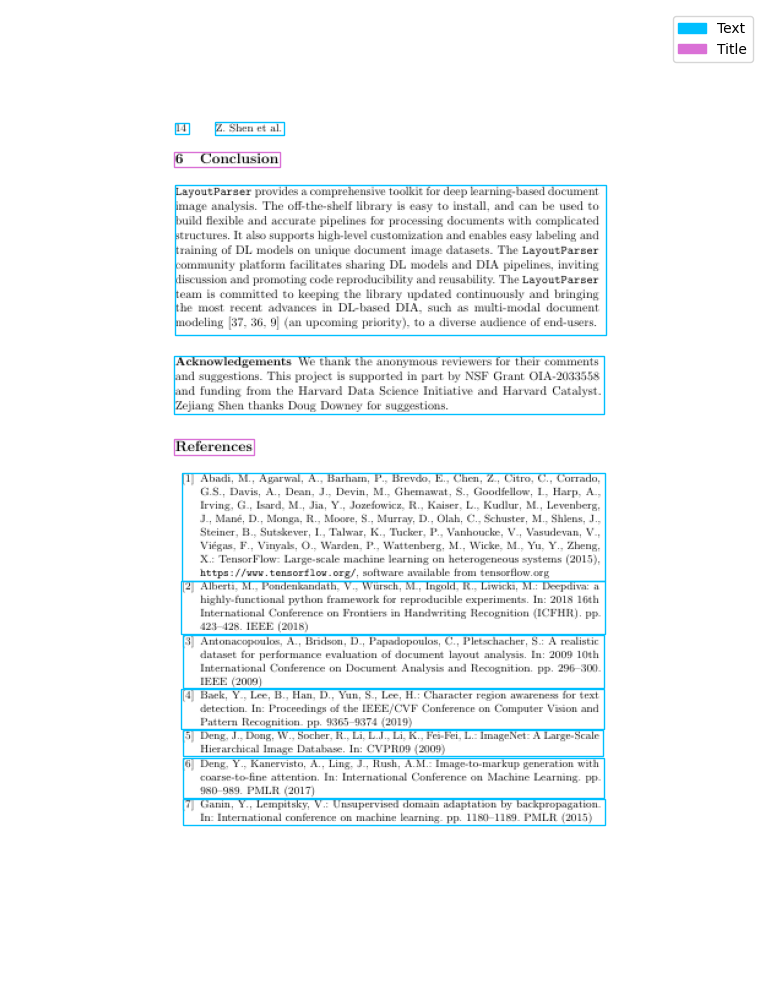

In [29]:
render_page(docs, 14, print_text=False)

Identify a specific "Title" document that contains "Conclusion" in its content and captures its ID.

Collect all documents whose parent_id matches this identified Title document's ID.

Prints out the content of these collected documents.

In [31]:
conclusion_docs = []
parent_id = -1
for doc in docs:
    if doc.metadata["category"] == "Title" and "Conclusion" in doc.page_content:
        parent_id = doc.metadata["element_id"]
    if doc.metadata.get("parent_id") == parent_id:
        conclusion_docs.append(doc)

for doc in conclusion_docs:
    print(doc.page_content)

LayoutParser provides a comprehensive toolkit for deep learning-based document image analysis. The oﬀ-the-shelf library is easy to install, and can be used to build ﬂexible and accurate pipelines for processing documents with complicated structures. It also supports high-level customization and enables easy labeling and training of DL models on unique document image datasets. The LayoutParser community platform facilitates sharing DL models and DIA pipelines, inviting discussion and promoting code reproducibility and reusability. The LayoutParser team is committed to keeping the library updated continuously and bringing the most recent advances in DL-based DIA, such as multi-modal document modeling [37, 36, 9] (an upcoming priority), to a diverse audience of end-users.
Acknowledgements We thank the anonymous reviewers for their comments and suggestions. This project is supported in part by NSF Grant OIA-2033558 and funding from the Harvard Data Science Initiative and Harvard Catalyst. 

# Extracting text from images
OCR is run on images, enabling the extraction of text therein:



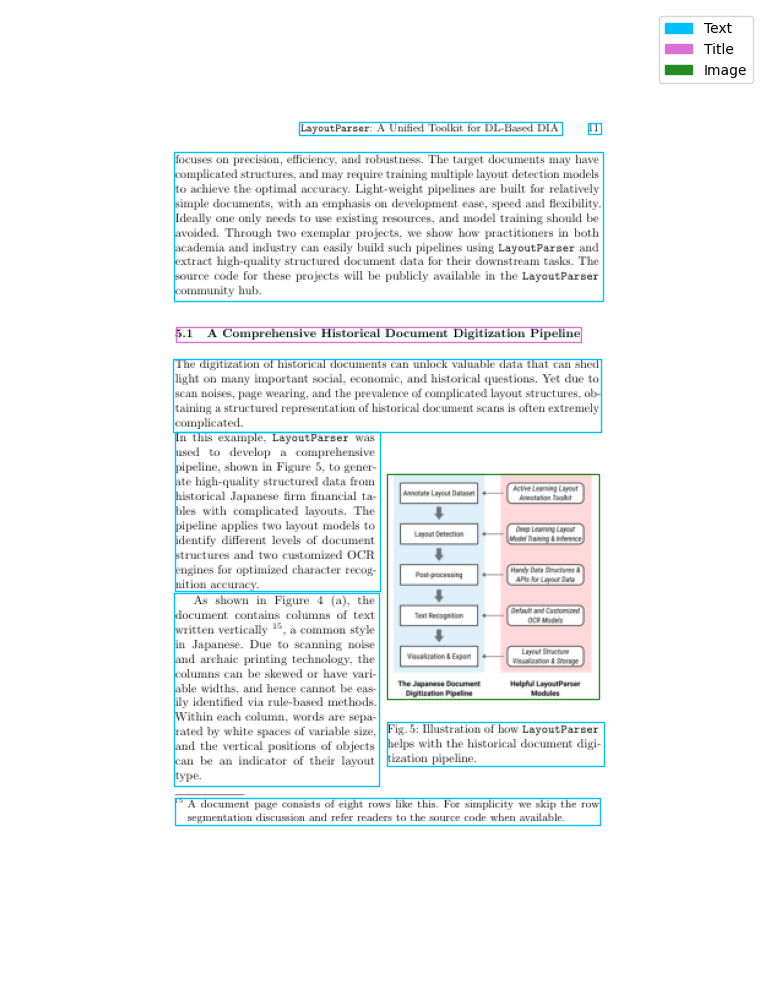

LayoutParser: A Uniﬁed Toolkit for DL-Based DIA

focuses on precision, eﬃciency, and robustness. The target documents may have complicated structures, and may require training multiple layout detection models to achieve the optimal accuracy. Light-weight pipelines are built for relatively simple documents, with an emphasis on development ease, speed and ﬂexibility. Ideally one only needs to use existing resources, and model training should be avoided. Through two exemplar projects, we show how practitioners in both academia and industry can easily build such pipelines using LayoutParser and extract high-quality structured document data for their downstream tasks. The source code for these projects will be publicly available in the LayoutParser community hub.

11

5.1 A Comprehensive Historical Document Digitization Pipeline

The digitization of historical documents can unlock valuable data that can shed light on many important social, economic, and historical questions. Yet due to scan

In [32]:
render_page(docs, 11)

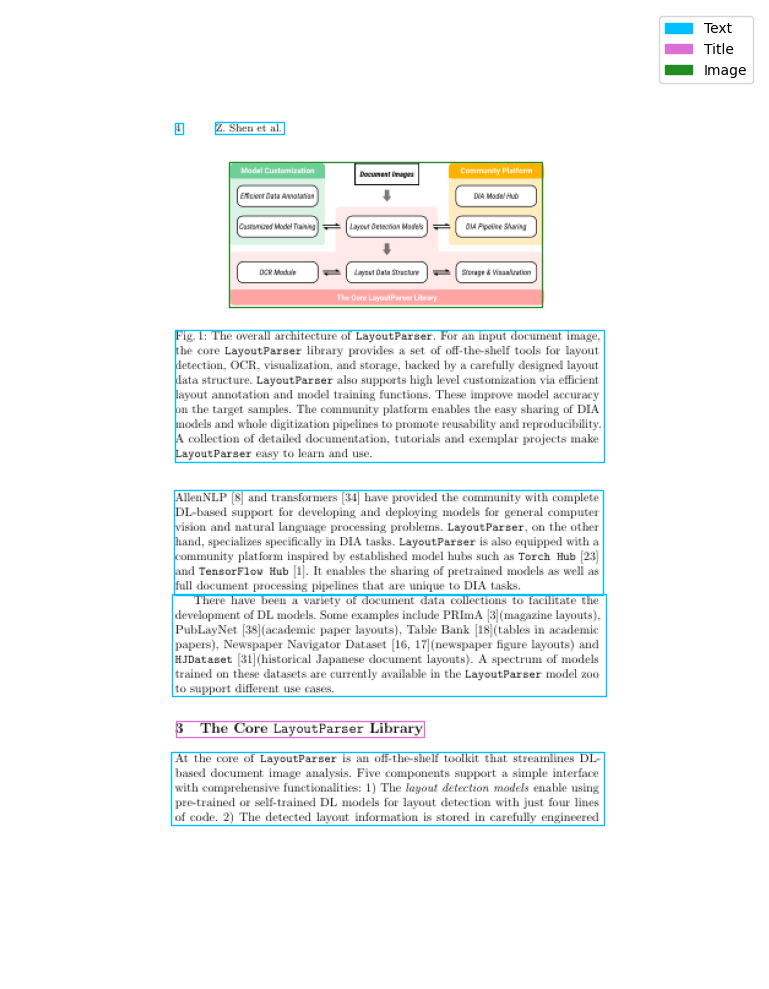

4

Z. Shen et al.

Efficient Data Annotation DIA Model Hub OCR Module = | apoutpate Srruclure] BN (Smrage&\/lsua/rzauonj

Fig. 1: The overall architecture of LayoutParser. For an input document image, the core LayoutParser library provides a set of oﬀ-the-shelf tools for layout detection, OCR, visualization, and storage, backed by a carefully designed layout data structure. LayoutParser also supports high level customization via eﬃcient layout annotation and model training functions. These improve model accuracy on the target samples. The community platform enables the easy sharing of DIA models and whole digitization pipelines to promote reusability and reproducibility. A collection of detailed documentation, tutorials and exemplar projects make LayoutParser easy to learn and use.

AllenNLP [8] and transformers [34] have provided the community with complete DL-based support for developing and deploying models for general computer vision and natural language processing problems. Layout

In [34]:
render_page(docs, 4)